# Project Title : Who do we target for Donations

#### Using Census Dataset, to build  a model that predicts the income.
#### We know that high income earners are better to approach for donations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('census_data.csv')

In [3]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :\n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['age', 'Workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

Missing values :   0

Unique values :
 age                  73
Workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64


## Exploratory Data Analysis

In [7]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
edu = df.groupby(by = ["education", "Income"])["Income"].count().unstack()
edu

Income,<=50K,>50K
education,,
10th,871.0,62.0
11th,1115.0,60.0
12th,400.0,33.0
1st-4th,162.0,6.0
5th-6th,317.0,16.0
7th-8th,606.0,40.0
9th,487.0,27.0
Assoc-acdm,802.0,265.0
Assoc-voc,1021.0,361.0


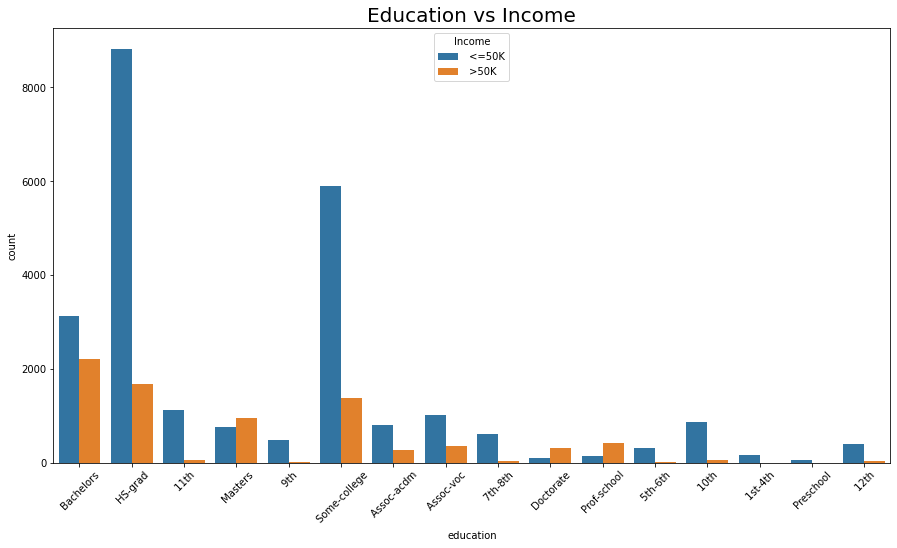

In [10]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = "education", hue = "Income")
plt.xticks(rotation = 45)
plt.title("Education vs Income", fontsize = 20)
plt.show()

### From above graph we can say that if higher the education then they mostly earn more than 50k compare to others

In [11]:
gen = df.groupby(by = ["sex", "Income"])["Income"].count().unstack()
gen

Income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


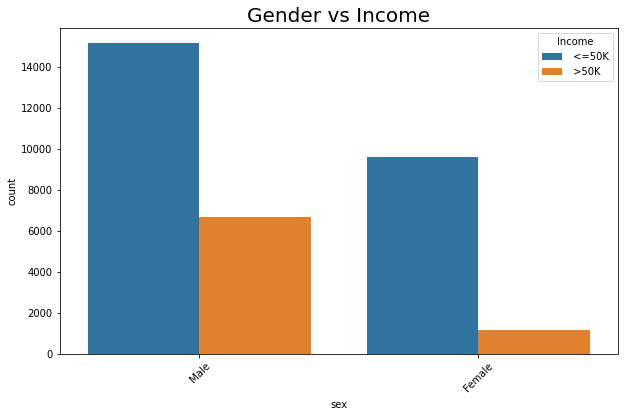

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = "sex", hue = "Income")
plt.xticks(rotation = 45)
plt.title("Gender vs Income", fontsize = 20)
plt.show()

### Male earn more than 50K compare to Female

In [13]:
edu_gen = df.groupby(by = ["education", "sex", "Income"])["Income"].count().unstack()
edu_gen

Income                  <=50K    >50K
education     sex                    
 10th          Female   292.0     3.0
               Male     579.0    59.0
 11th          Female   424.0     8.0
               Male     691.0    52.0
 12th          Female   140.0     4.0
               Male     260.0    29.0
 1st-4th       Female    46.0     NaN
               Male     116.0     6.0
 5th-6th       Female    82.0     2.0
               Male     235.0    14.0
 7th-8th       Female   159.0     1.0
               Male     447.0    39.0
 9th           Female   139.0     5.0
               Male     348.0    22.0
 Assoc-acdm    Female   365.0    56.0
               Male     437.0   209.0
 Assoc-voc     Female   433.0    67.0
               Male     588.0   294.0
 Bachelors     Female  1280.0   339.0
               Male    1854.0  1882.0
 Doctorate     Female    36.0    50.0
               Male      71.0   256.0
 HS-grad       Female  3164.0   226.0
               Male    5662.0  1449.0
 Masters       Female   357.0   179.0
               Male     407.0   780.0
 Preschool     Female    16.0     NaN
               Male      35.0     NaN
 Prof-school   Female    50.0    42.0
               Male     103.0   381.0
 Some-college  Female  2609.0   197.0
               Male    3295.0  1190.0

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


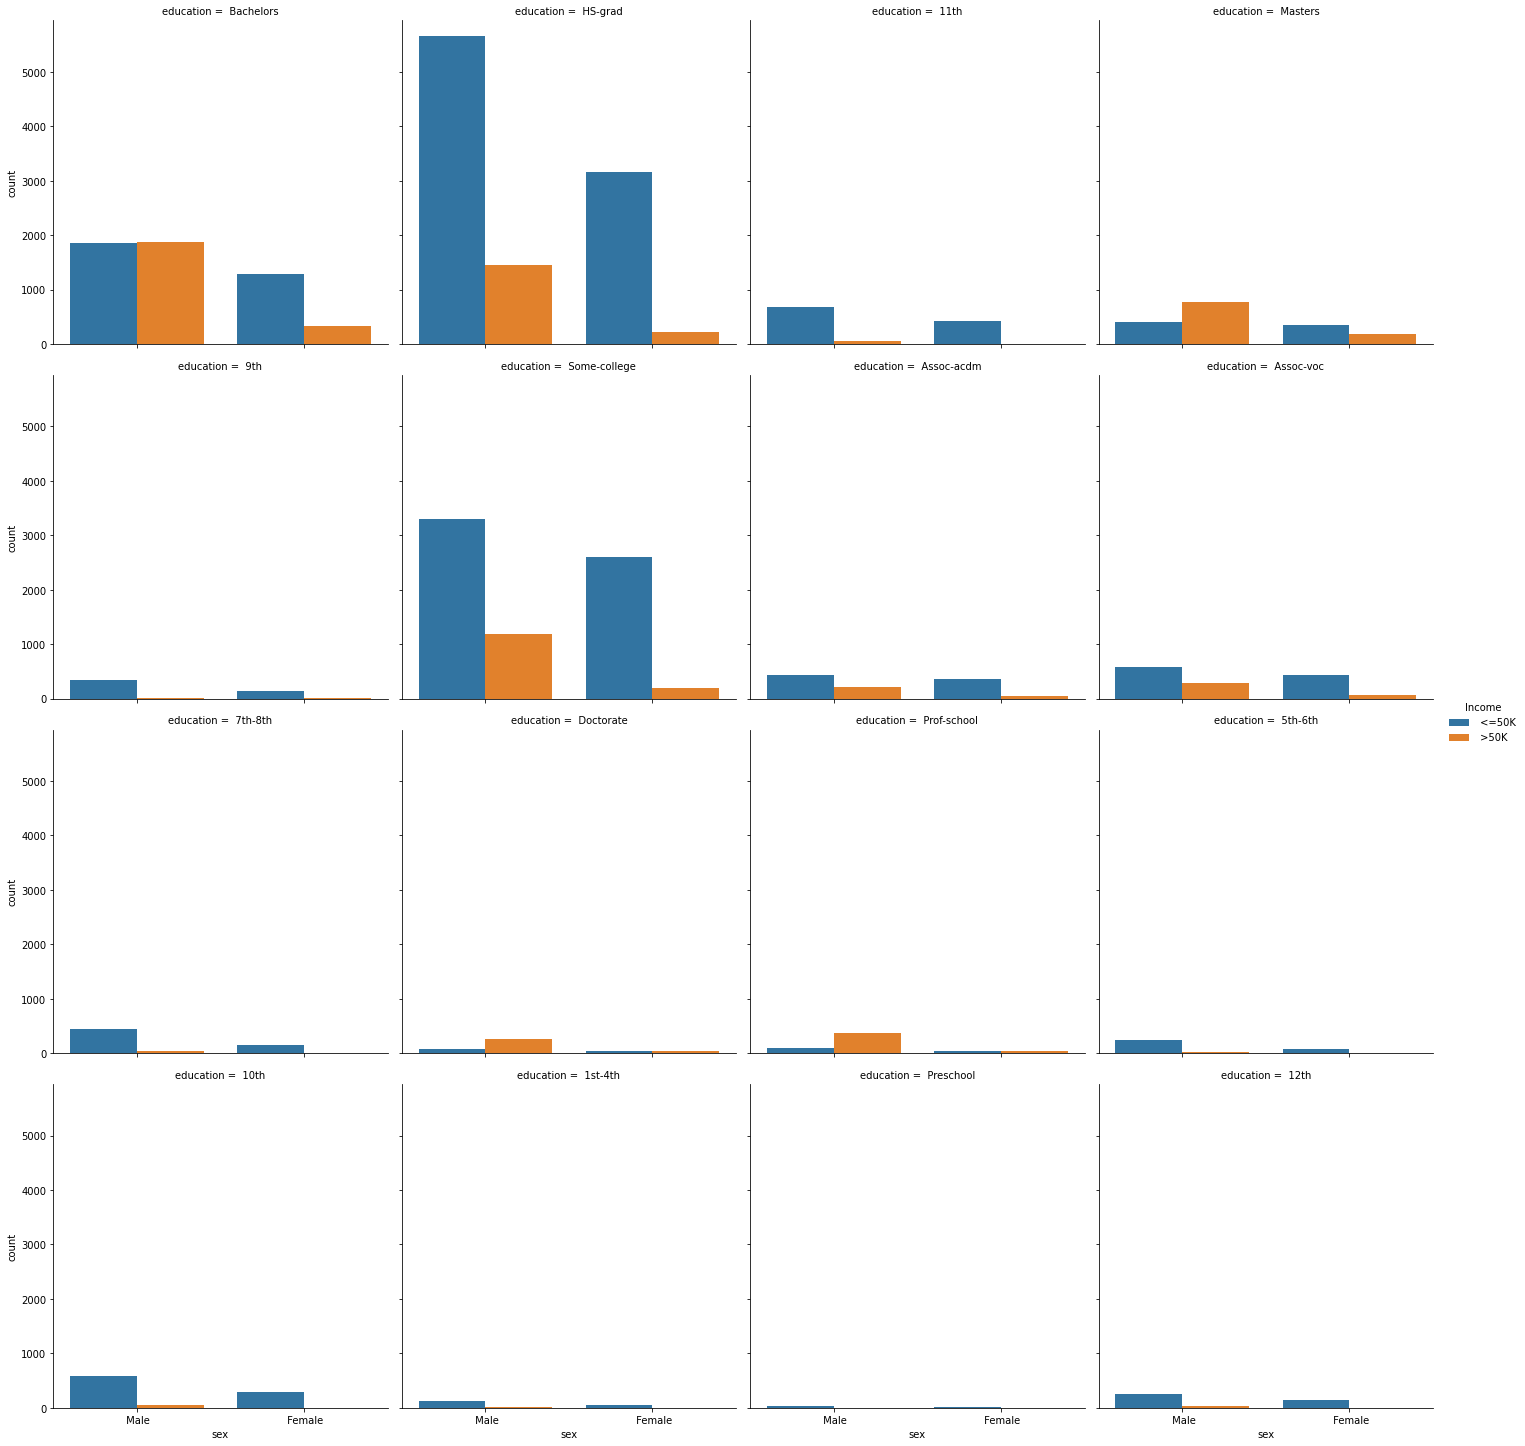

In [14]:
sns.factorplot("sex", col='education', data= df, hue='Income', kind="count", col_wrap=4)
plt.show()

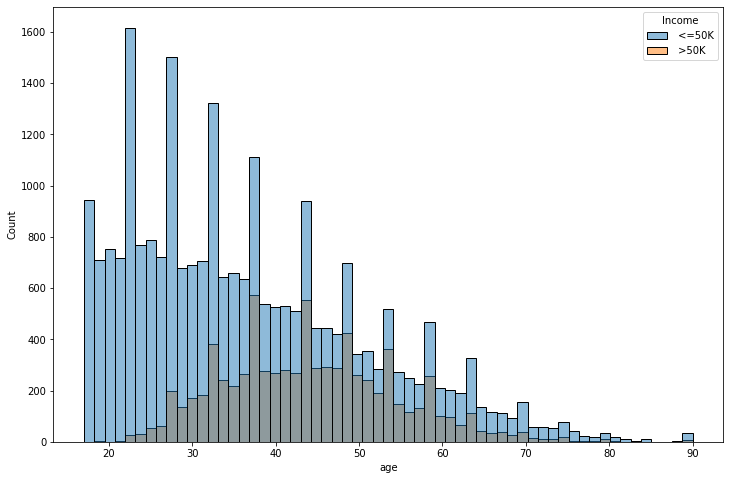

In [15]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = "age", hue = "Income")
plt.show()

In [16]:
age_more_50k = df[df["Income"] == " >50K"].age
age_more_50k = pd.DataFrame(data = age_more_50k)

In [17]:
age_more_50k.reset_index(drop = True, inplace = True)

In [18]:
age_more_50k.describe()

,age
count,7841.000000
mean,44.249841
std,10.519028
min,19.000000
25%,36.000000
50%,44.000000
75%,51.000000
max,90.000000


### most of age between 36 to 51 earn more than 50k

In [19]:
df[df["Workclass"] == " ?"]

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [20]:
df[df["native-country"] == " ?"]

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [21]:
df = df[df["Workclass"] != " ?"]

In [22]:
df = df[df["native-country"] != " ?"]

In [23]:
# fnlwgt: final weight. (this is the number of people the census believes the entry represents)
df.drop("fnlwgt", axis = 1, inplace = True)

In [24]:
df.head()

,age,Workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30169 non-null  int64 
 1   Workclass       30169 non-null  object
 2   education       30169 non-null  object
 3   education-num   30169 non-null  int64 
 4   marital-status  30169 non-null  object
 5   occupation      30169 non-null  object
 6   relationship    30169 non-null  object
 7   race            30169 non-null  object
 8   sex             30169 non-null  object
 9   capital-gain    30169 non-null  int64 
 10  capital-loss    30169 non-null  int64 
 11  hours-per-week  30169 non-null  int64 
 12  native-country  30169 non-null  object
 13  Income          30169 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [26]:
cat = list(df.select_dtypes(include = "object").columns)

In [27]:
num = list(df.select_dtypes(include = "int64").columns)

In [28]:
df_cat = df[cat].drop("Income", axis = 1)

In [29]:
df_num = df[num]

In [30]:
df_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [31]:
df_num

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


# Encoding data

In [32]:
target = df["Income"].apply(lambda x: 0 if x == " <=50K" else 1)

In [33]:
target.value_counts()

0    22661
1     7508
Name: Income, dtype: int64

In [34]:
y = target.values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
oe = OrdinalEncoder()
oe.fit(df_cat)
X_enc = oe.transform(df_cat)

In [37]:
X_enc

array([[ 6.,  9.,  4., ...,  4.,  1., 38.],
       [ 5.,  9.,  2., ...,  4.,  1., 38.],
       [ 3., 11.,  0., ...,  4.,  1., 38.],
       ...,
       [ 3., 11.,  6., ...,  4.,  0., 38.],
       [ 3., 11.,  4., ...,  4.,  1., 38.],
       [ 4., 11.,  2., ...,  4.,  0., 38.]])

# Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X_enc,y)

In [40]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_cat.columns)

In [41]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [42]:
featureScores.sort_values(by = "Score", ascending = False)

,Features,Score
4,relationship,3437.946656
2,marital-status,982.766826
6,sex,459.258171
1,education,265.504043
3,occupation,188.893250
5,race,29.364083
7,native-country,16.677855
0,Workclass,0.000156


In [43]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(df_num,y)

In [44]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_num.columns)

In [45]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [46]:
featureScores.sort_values(by = "Score", ascending = False)

,Features,Score
2,capital-gain,7.415290e+07
3,capital-loss,1.256783e+06
0,age,7.939871e+03
4,hours-per-week,5.575944e+03
1,education-num,2.180106e+03


In [47]:
df_cat_new = df_cat[["relationship", "marital-status", "sex", "education", "occupation"]]
df_cat_new

,relationship,marital-status,sex,education,occupation
0,Not-in-family,Never-married,Male,Bachelors,Adm-clerical
1,Husband,Married-civ-spouse,Male,Bachelors,Exec-managerial
2,Not-in-family,Divorced,Male,HS-grad,Handlers-cleaners
3,Husband,Married-civ-spouse,Male,11th,Handlers-cleaners
4,Wife,Married-civ-spouse,Female,Bachelors,Prof-specialty
...,...,...,...,...,...
32556,Wife,Married-civ-spouse,Female,Assoc-acdm,Tech-support
32557,Husband,Married-civ-spouse,Male,HS-grad,Machine-op-inspct
32558,Unmarried,Widowed,Female,HS-grad,Adm-clerical
32559,Own-child,Never-married,Male,HS-grad,Adm-clerical


In [48]:
df_final = df_cat_new.join(df_num)

In [49]:
df_final

,relationship,marital-status,sex,education,occupation,age,education-num,capital-gain,capital-loss,hours-per-week
0,Not-in-family,Never-married,Male,Bachelors,Adm-clerical,39,13,2174,0,40
1,Husband,Married-civ-spouse,Male,Bachelors,Exec-managerial,50,13,0,0,13
2,Not-in-family,Divorced,Male,HS-grad,Handlers-cleaners,38,9,0,0,40
3,Husband,Married-civ-spouse,Male,11th,Handlers-cleaners,53,7,0,0,40
4,Wife,Married-civ-spouse,Female,Bachelors,Prof-specialty,28,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...
32556,Wife,Married-civ-spouse,Female,Assoc-acdm,Tech-support,27,12,0,0,38
32557,Husband,Married-civ-spouse,Male,HS-grad,Machine-op-inspct,40,9,0,0,40
32558,Unmarried,Widowed,Female,HS-grad,Adm-clerical,58,9,0,0,40
32559,Own-child,Never-married,Male,HS-grad,Adm-clerical,22,9,0,0,20


In [50]:
# One-hot encode using pandas.get_dummies()
features_final = pd.get_dummies(df_final)

In [51]:
features_final

,age,education-num,capital-gain,capital-loss,hours-per-week,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,13,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,7,0,0,40,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,40,9,0,0,40,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,58,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32559,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final.values, y, test_size = 0.2, random_state = 0)

In [53]:
X_train

array([[  23,   10,    0, ...,    0,    0,    0],
       [  27,    9,    0, ...,    0,    0,    0],
       [  55,    6,    0, ...,    0,    0,    0],
       ...,
       [  20,    9,    0, ...,    0,    0,    0],
       [  51,    7,    0, ...,    0,    0,    0],
       [  34,    9, 3325, ...,    0,    0,    0]], dtype=int64)

In [54]:
X_train[:, :5]

array([[  23,   10,    0,    0,   40],
       [  27,    9,    0,    0,   50],
       [  55,    6,    0,    0,   40],
       ...,
       [  20,    9,    0,    0,   25],
       [  51,    7,    0,    0,   40],
       [  34,    9, 3325,    0,   35]], dtype=int64)

# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :5] = sc.fit_transform(X_train[:, :5])
X_test[:, :5] = sc.transform(X_test[:, :5])

In [56]:
X_train

array([[-1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  0,  0,  0],
       ...,
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [57]:
X_test

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  1,  0,  0],
       [ 1,  1,  0, ...,  1,  0,  0],
       [ 0, -1,  0, ...,  0,  0,  0]], dtype=int64)

# Training model on the Training set

In [58]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier

In [87]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_acc =accuracy_score(y_test, y_pred)
dt_acc

[[4151  415]
 [ 651  817]]


0.8233344381836262

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4566
           1       0.66      0.56      0.61      1468

    accuracy                           0.82      6034
   macro avg       0.76      0.73      0.75      6034
weighted avg       0.82      0.82      0.82      6034



# AdaBoostClassifier

In [90]:
ad = AdaBoostClassifier(random_state = 0)
ad.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [91]:
y_pred = ad.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ad_acc = accuracy_score(y_test, y_pred)
ad_acc

[[4217  349]
 [ 645  823]]


0.8352668213457076

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4566
           1       0.70      0.56      0.62      1468

    accuracy                           0.84      6034
   macro avg       0.78      0.74      0.76      6034
weighted avg       0.83      0.84      0.83      6034



# Random Forest Classifier

In [93]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [94]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ad_acc = accuracy_score(y_test, y_pred)
ad_acc

[[4168  398]
 [ 635  833]]


0.8288034471329135

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4566
           1       0.68      0.57      0.62      1468

    accuracy                           0.83      6034
   macro avg       0.77      0.74      0.75      6034
weighted avg       0.82      0.83      0.82      6034



# confusion_matrix

-------Decision Tree---------


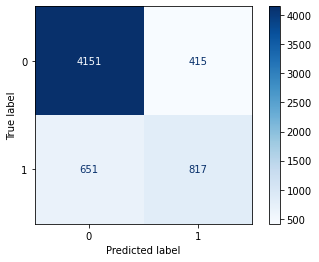

---------Ada Booster---------


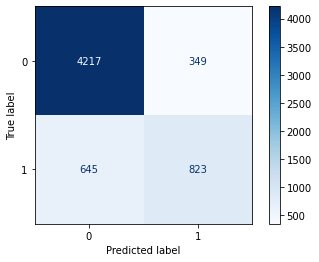

---------Random Forest---------


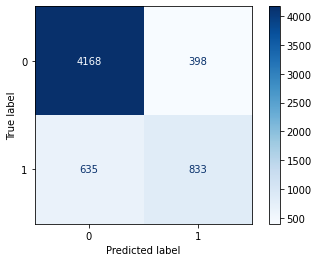

In [96]:
print("-------Decision Tree---------")
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues);
plt.show()
print("---------Ada Booster---------")
plot_confusion_matrix(ad, X_test, y_test, cmap=plt.cm.Blues);
plt.show()
print("---------Random Forest---------")
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues);
plt.show()

## AdaBoost is the most appropriate for this task.
## It performs the best on the testing data, in terms of the accuracy.

# HyperParameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
ad = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [74]:
#parameters list to tune
parameters = {'n_estimators':[50, 100, 120], 
              'learning_rate':[0.1, 0.5, 1.],
             }

In [75]:
gs = GridSearchCV(estimator = ad, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [76]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 120]},
             scoring='accuracy')

In [77]:
best_accuracy = gs.best_score_
best_parameters = gs.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.17 %
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
